# Cargar datos proporcionados

In [1]:
# Importar librerías
import pandas as pd 

file_name = 'marambio_2007.csv'
df = pd.read_csv('marambio_2007.csv', sep=';', index_col='Unnamed: 0') # cargar archivo csv
# df.drop(columns=['año'], inplace=True )
df.head() # visualizar 5 primeras filas 

,ukmo,cmam,gembach,ncep,ecmwf
1001,191.8850,191.4259,191.5605,190.3499,192.1477
1002,190.5867,189.4517,190.3790,188.6695,188.3967
1003,190.4485,190.6399,191.0684,190.4134,189.6597
1004,192.5483,191.6376,192.6831,191.4446,190.7733
1005,193.0735,193.6450,193.9516,192.8147,192.4866


## Pregunta 1
Nombre de las variables:

In [2]:
print('Primer método: ', df.columns)
print('Segundo método: ', df.keys())

Primer método:  Index(['ukmo', 'cmam', 'gembach', 'ncep', 'ecmwf'], dtype='object')
Segundo método:  Index(['ukmo', 'cmam', 'gembach', 'ncep', 'ecmwf'], dtype='object')


## Pregunta 2
Los pronósticos se registraton para el período 01/10/2007 a 31/12/2007

## Pregunta 3
La temperatura promedio para cada uno de los modelos climáticos:

In [3]:
for model in df.keys():
    print('La temperatura promedio del modelo %s es: %.2f K'%(model.upper(), df[model].mean()))

La temperatura promedio del modelo UKMO es: 220.87 K
La temperatura promedio del modelo CMAM es: 220.53 K
La temperatura promedio del modelo GEMBACH es: 221.45 K
La temperatura promedio del modelo NCEP es: 220.19 K
La temperatura promedio del modelo ECMWF es: 220.38 K


## Pregunta 4
La temperatura máxima y mínima para el modelo CMAM:

In [4]:
modelo = 'cmam'
print('La temperatura máxima y mínima para el modelo CMAM es %.2f K y %.2f K, respectivamente'%(df[modelo].max(),df[modelo].min()))

La temperatura máxima y mínima para el modelo CMAM es 238.27 K y 189.45 K, respectivamente


## Pregunta 5
Las medianas para los modelos CMAM y UKMO son:

In [5]:
modelos = ['cmam', 'ukmo']
for model in modelos:
    print ('La mediana para el modelo %s es: %.2f K'%(model.upper(), df[model].median()))

La mediana para el modelo CMAM es: 226.30 K
La mediana para el modelo UKMO es: 226.98 K


## Pregunta 6
Estudio univariado para cada modelo

In [6]:
df.describe()

,ukmo,cmam,gembach,ncep,ecmwf
count,89.000000,92.000000,92.000000,85.000000,92.000000
mean,220.867209,220.531189,221.452630,220.192254,220.379674
std,13.272229,13.603264,13.251610,13.800099,13.524525
min,190.448500,189.451700,190.379000,188.669500,188.396700
25%,211.206100,212.833350,212.757850,208.895400,210.964075
50%,226.984800,226.304500,227.245400,226.317600,226.435000
75%,229.888100,230.860750,230.094925,230.422000,230.056525
max,239.133700,238.271600,240.403900,239.030800,238.087900


In [7]:
import numpy as np
import matplotlib.pyplot as plt
def graph_plot(df, modelo):
    df1 = df[modelo].dropna()
#     df1 = (df1 - df1.mean())/df1.std()
    fig, axs = plt.subplots(1,2, figsize=(12, 6))
    fig.tight_layout(pad=10)
    ### Cálculo del # de bins según la regla de Freedman-Diaconis
    q1, q3 = np.percentile(df1, [25, 75])
    iqr = q3 - q1
    binsFD = int(2*iqr/len(df1)**(1/3))
    ####
    axs[0].hist(df1, bins=binsFD, 
                label='sesgo: %.2f \ncurtosis: %.2f'%(df1.skew(), df1.kurtosis()))
#     sns.distplot(a=df1, ax=axs[0])
    axs[0].set_title('Histograma del modelo %s'%modelo.upper())
    axs[0].set_xlabel('Temperatura en K')
    axs[0].legend()
    axs[0].grid(True)
    axs[1].boxplot(df1)
    axs[1].grid(True)
    axs[1].set_title('Boxplot del modelo %s'%modelo.upper())
    axs[1].set_ylabel('Temperatura en K')
    del df1

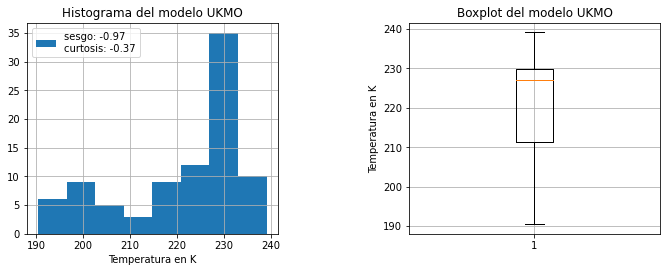

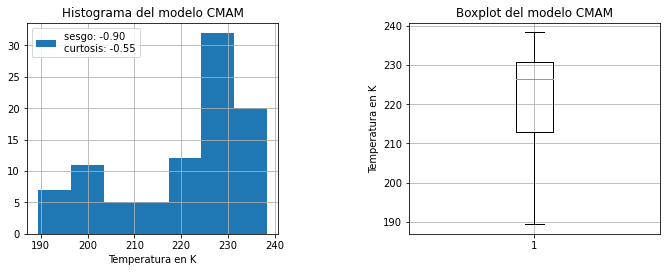

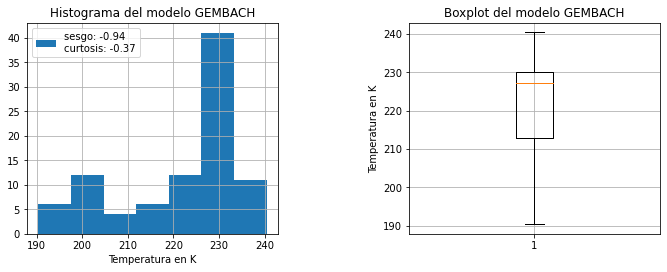

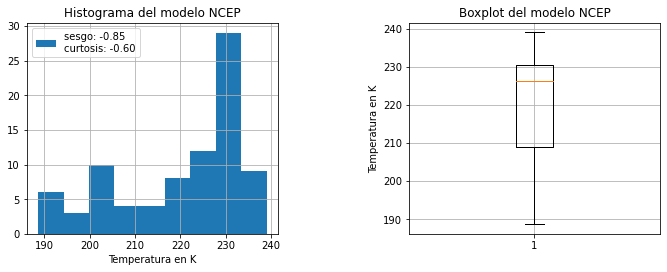

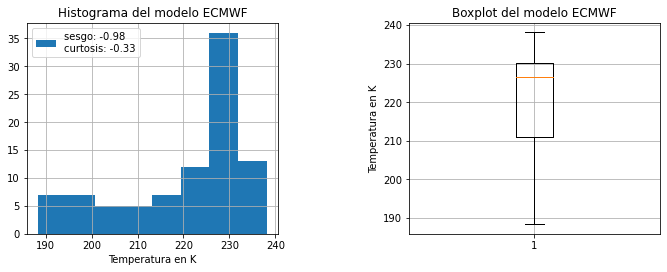

In [8]:
for model in df.keys():
    graph_plot(df, model)

## Pregunta 7
Dividir aleatoriaente el registro en dos partes:

In [9]:
from sklearn.utils import shuffle

df = shuffle(df)

perc_train = 0.8

cantidad = int(perc_train*len(df))
df_train = df[:cantidad]
df_test = df[cantidad:]

In [10]:
print('Cantidad de elementos en el dataset:', len(df))
print('Cantidad de elementos en el set de entrenamieto:', len(df_train))
print('Cantidad de elementos en el set de testeo:', len(df_test))

Cantidad de elementos en el dataset: 92
Cantidad de elementos en el set de entrenamieto: 73
Cantidad de elementos en el set de testeo: 19
